# Zadatak 1: Zaključivanje u statičkoj Bejzovoj mreži

Za Bejzovu mrežu datu u postavci domaćeg, potrebno je odrediti uslovnu verovatnoću $p(c^+|f^+, g^+)$.

Ovo je potrebno uraditi sledećim metodama:
- metodom eliminacije,
- uzorkovanjem sa odbacivanjem,
- Gibbs-ovim uzorkovanjem (neparan indeks).

## 1.1. Prikaz grafa Bejzove mreže

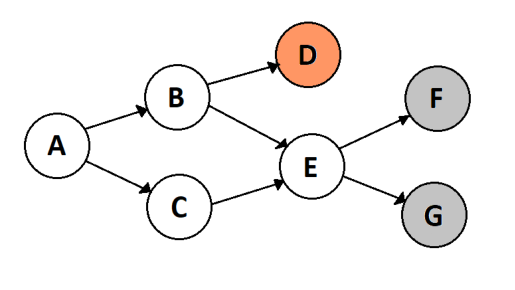

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('./BM_model.png')

plt.imshow(img); plt.axis('off'); plt.show()

## 1.2. Procena $p(c^+|f^+,g^+)$ metodom eliminacije

**Metoda eliminacije** je najjednostavnija metoda tačnog zaključivanja u Bejzovim mrežama. Ne uvodi aproksimacije, već izračunava tačne verovatnoće događaja koristeći osobine uslovne verovatnoće i strukturu date mreže. 

Da bismo našli datu uslovnu raspodelu, potrebno je primeniti Bejzovo pravilo:

$p(C|f^+, g^+) \propto p(C, f+, g+) = \sum\limits_{a,b,e} p(a) \cdot p(b|a) \cdot p(C|a) \cdot p(e|b,C) \cdot p(f^+|e) \cdot p(g^+|e)$

U prethodnom izrazu je potrebno **marginalizovati** promenljive a, b i e. Ovo možemo uraditi pomoću više redosleda biranja promenljivih. Pokazuje se da će redosled A, E, B da ima manje potrebnih računskih operacija, pa ćemo tim redosledom ih marginalizovati.

- Eliminisanje promenljive a: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$\phi_7(a,b,c) = p(a) \cdot p(b|a) \cdot p(C|a)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$f_7(b,c) = \sum\limits_{a}\phi_7(a,b,c)$



|b    |c    |   a | $$\phi_{7}(b,c,a)$$      |$$f_{7}(b,c)$$|
|:---:|:---:|:---:|:---------------------:|:----------:|
|0    |0    |0    |0.6 * 0.7 * 0.7 = 0.294|0.318       |
|0|0|1|0.4 * 0.2 * 0.3 = 0.024||
|0|1|0|0.6 * 0.7 * 0.3 = 0.126|0.182|
|0|1|1|0.4 * 0.2 * 0.7 = 0.056||
|1|0|0|0.6 * 0.3 * 0.7 = 0.126|0.222|
|1|0|1|0.4 * 0.8 * 0.3 = 0.096||
|1|1|0|0.6 * 0.3 * 0.3 = 0.054|0.278|
|1|1|1|0.4 * 0.8 * 0.7 = 0.224||

<br>
<br>
<br>


$p(C, f+, g+) = \sum\limits_{b,e} f_7(b,c) \cdot p(e|b,C) \cdot p(f^+|e) \cdot p(g^+|e)$

- Eliminisanje promenljive e: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$\phi_8(b,c, e) = p(e|b,c) \cdot p(f^+|e) \cdot p(g^+|e)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$f_8(b,c) = \sum\limits_{e}\phi_8(b,c,e)$







|b    |c    |   e | $$\phi_{8}(b,c,e)$$      |$$f_{8}(b,c)$$|
|:-:|:-:|:-:|:---------------:|:----------:|
|0  |0|0|0.1 * 0.6 * 0.2 = 0.012|0.264|
|0  |0|1|0.9 * 0.4 * 0.7 = 0.252||
|0  |1|0|0.5 * 0.6 * 0.2 = 0.06|0.2|
|0  |1|1|0.5 * 0.4 * 0.7 = 0.14||
|1  |0|0|0.2 * 0.6 * 0.2 = 0.024|0.248|
|1  |0|1|0.8 * 0.4 * 0.7 = 0.224||
|1  |1|0|0.8 * 0.6 * 0.2 = 0.096|0.1552|
|1  |1|1|0.2 * 0.4 * 0.7 = 0.056||


<br>
<br>
<br>

$p(C, f+, g+) = \sum\limits_{b} f_7(b,c) \cdot f_8(b,c)$

- Eliminisanje promenljive b: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$\phi_9(b,c) = f_7(b,c) \cdot f_8(b,c)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$f_9(c) = \sum\limits_{b}\phi_9(b,c)$

b|c|$\phi_{9}(b,c)$
:---:|:---:|:---:
0|0|0.318 * 0.264 = 0.083952
0|1|0.182 * 0.2 = 0.0364
1|0|0.222 * 0.248 = 0.055056
1|1|0.278 * 0.152 = 0.042256

<br>
<br>
<br>

$p(c^+|f^+,g^+) = \alpha \cdot (0.0364 + 0.042256) = \alpha \cdot 0.078656$

$p(c^-|f^+,g^+) = \alpha \cdot (0.083952 + 0.055056) = \alpha \cdot 0.139008$

$p(c^+|f^+,g^+) + p(c^-|f^+,g^+) = \alpha \cdot 0.217664 = 1$

$p(c^+|f^+,g^+) \approx 0.361364$

## 1.3. Procena $p(c^+|f^+,g^+)$ uzorkovanjem sa odbacivanjem

Prethodna metoda je bila 'tačna metoda' za određivanje verovatnoće. Naredne dve metode predstavljaju Monte Karlo metode procene i zasnivaju se na uzorkovanju promenljivih. 

Najpre cemo uzorkovati sa odbacivanjem. Ova metoda podrazumeva da na osnovu datih raspodela u postavci domaćeg generišemo odbirke promenljivih a zatim iz takvog uzorka procenimo verovatnoću kao:

$p(c^+|f^+, g^+) \approx \frac{ \#(*,*,c^+,*,*,f^+,g^+) }{ \#(*,*,*,*,*,f^+,g^+) } $

**Odbacivanje**

Prilikom uzorkovanja, ukoliko bismo išli po promenljivama abecednim redom, kada dobijemo kao uzorak za $f = f^-$, onda nema potrebe da dalje uzorkujemo i promenljivu g. Ova ušteda se naziva odbacivanje i mi ćemo sa ovim poboljšanjem da realizujemo procenu.

In [3]:
from random import random 
import numpy as np

# Probability tables
table_a = np.array([0.6])
table_b = np.array([0.7, 0.2])
table_c = np.array([0.7, 0.3])
table_d = np.array([0.4, 0.8])
table_e = np.array([0.1, 0.5, 0.2, 0.8])
table_f = np.array([0.4, 0.6])
table_g = np.array([0.8, 0.3])

# Define functions for generating an output based on inputs
def generate_A():
    r = random()
    if r < 0.6:
        return False
    return True

def generate_B(a: bool):
    r = random()
    compare_value = table_b[np.packbits([a], bitorder='little')]
    if r<compare_value:
        return False
    return True

def generate_C(a: bool):
    r = random()
    compare_value = table_c[np.packbits([a], bitorder='little')]
    if r<compare_value:
        return False
    return True

def generate_D(b: bool):
    r = random()
    compare_value = table_d[np.packbits([b], bitorder='little')]
    if r<compare_value:
        return False
    return True

def generate_E(b: bool, c:bool):
    r = random()
    compare_value = table_e[np.packbits([c, b], bitorder='little')]
    if r<compare_value:
        return False
    return True
    
def generate_F(e: bool):
    r = random()
    compare_value = table_f[np.packbits([e], bitorder='little')]
    if r<compare_value:
        return False
    return True

def generate_G(e: bool):
    r = random()
    compare_value = table_g[np.packbits([e], bitorder='little')]
    if r<compare_value:
        return False
    return True

In [35]:
N_rejection = 1200

Nr = 100

rejection_estimations = np.empty(Nr, dtype=float)

for i in range(Nr):
    sample_count = 0
    specific_count = 0
    for j in range(N_rejection):
        a = generate_A()
        b = generate_B(a)
        c = generate_C(a)
        e = generate_E(b, c)
        f = generate_F(e)
        if not f: 
            continue
        g = generate_G(e)
        if f and g:
            sample_count+=1
            if c:
                specific_count+=1
    
    rejection_estimations[i] = specific_count/sample_count

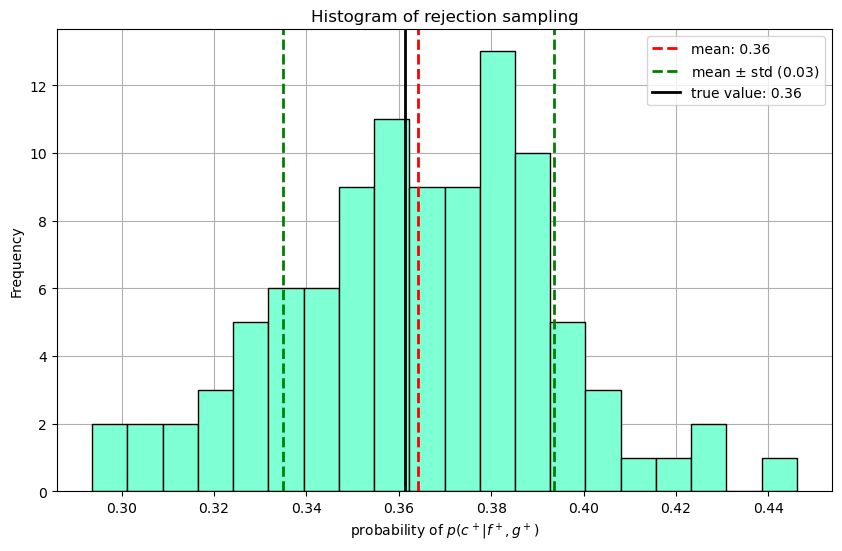

In [36]:
import matplotlib.pyplot as plt

mean_rejection = np.mean(rejection_estimations)
std_dev_rejection = np.std(rejection_estimations)
x = 0.361364

plt.figure(figsize=(10,6))

plt.rc('axes', axisbelow=True)
plt.hist(rejection_estimations, color='aquamarine', bins=20, edgecolor='black')
plt.axvline(mean_rejection, color='red', linestyle='dashed', linewidth=2, label=f'mean: {mean_rejection:.2f}')
plt.axvline(mean_rejection - std_dev_rejection, color='green', linestyle='dashed', linewidth=2, label=f'mean $\pm$ std ({std_dev_rejection:.2f})')
plt.axvline(mean_rejection + std_dev_rejection, color='green', linestyle='dashed', linewidth=2)
plt.axvline(x, color='black', linestyle='solid', linewidth=2, label=f'true value: {x:.2f}')

plt.legend()
plt.xlabel('probability of $p(c^+|f^+,g^+)$')
plt.ylabel('Frequency')
plt.title('Histogram of rejection sampling')
plt.grid(True)

plt.show()

## 1.4. Procena $p(c^+|f^+,g^+)$ Gibbs-ovim uzorkovanjem

Gibbs-ovo uzorkovanje je metoda Monte Karlo uzorkovanja. Predstavlja posebnu vrstu MCMC-a (Markov Chain Monte Carlo). Metoda ima za zadatak da uzorkuje iz raspodele $p(X)=p(x_1,x_2,...,x_n)$. Princip rada je sledeći:
1. inicijalizacija: $X^{(0)} = (x_1^{(0)}, x_2^{(0)}, ..., x_n^{(0)})$
2. iteracije $i = 1,...,N:$

$ \qquad x_1^{(i)} \sim p(x_1 | x_2^{(i-1)}, x_3^{(i-1)}, ..., x_n^{(i-1)})$

$ \qquad x_2^{(i)} \sim p(x_2 | x_1^{(i)}, x_3^{(i-1)}, ..., x_n^{(i-1)})$

$ \qquad ...$

$ \qquad x_n^{(i)} \sim p(x_n | x_1^{(i)}, x_2^{(i)}, ..., x_{n-1}^{(i-1)})$

Primenom ove metode ćemo uzorkovati uzorak za našu Bejzovu mrežu. Da bismo ovo postigli, potrebno je da nađemo uslovne raspodele svih promenljivih mreže pri datim svim ostalim promenljivama. Za ove potrebe ćemo koristiti sledeću osobinu:

$ \qquad MP(X_i) = R \cup D \cup S$

$ \qquad p( X_i | x_{j\ne i} ) \propto p(D|X_i,S) \cdot p(X_i|R)$

1. Raspodela $p(A|b,c,d,e,f^+,g^+):$

$p(A|...) \propto p(b,c|A) \cdot p(A)$

b | c | $$p(a^+\|...)$$ | $$p(a^-\|...)$$ | $$\alpha^{-1}$$ | $$p(a^+\|b,c)$$
:---:|:---:|:---:|:---:|:---:|:---:
0 | 0 | 0.024 * $\alpha$ | 0.294 * $\alpha$ | 0.318 | 0.0755
0 | 1 | 0.056 * $\alpha$ | 0.126 * $\alpha$ | 0.182 | 0.3077
1 | 0 | 0.096 * $\alpha$ | 0.126 * $\alpha$ | 0.222 | 0.4324
1 | 1 | 0.224 * $\alpha$ | 0.054 * $\alpha$ | 0.278 | 0.8058

2. Raspodela $p(B|a,c,d,e,f^+,g^+):$

$p(B|...) \propto p(e|B,c) \cdot p(d|B) \cdot p(B|a)$


a | c | d | e | $$p(b^+\|...) / \alpha$$ | $$p(b^-\|...) / \alpha$$ | $$\alpha^{-1}$$ | $$p(b^+\|a,c,d,e)$$
:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:
0 | 0 | 0 | 0 | 0.048 | 0.028 | 0.076 | 0.6316
0 | 0 | 0 | 1 | 0.192 | 0.252 | 0.444 | 0.4324
0 | 0 | 1 | 0 | 0.012 | 0.042 | 0.054 | 0.2222
0 | 0 | 1 | 1 | 0.048 | 0.378 | 0.426 | 0.1127
0 | 1 | 0 | 0 | 0.192 | 0.140 | 0.332 | 0.5783
0 | 1 | 0 | 1 | 0.048 | 0.140 | 0.188 | 0.2553
0 | 1 | 1 | 0 | 0.048 | 0.210 | 0.258 | 0.1860
0 | 1 | 1 | 1 | 0.012 | 0.210 | 0.222 | 0.0540
1 | 0 | 0 | 0 | 0.128 | 0.008 | 0.136 | 0.9412
1 | 0 | 0 | 1 | 0.512 | 0.072 | 0.584 | 0.8767
1 | 0 | 1 | 0 | 0.032 | 0.012 | 0.044 | 0.7272
1 | 0 | 1 | 1 | 0.128 | 0.108 | 0.236 | 0.5424
1 | 1 | 0 | 0 | 0.512 | 0.040 | 0.552 | 0.9275
1 | 1 | 0 | 1 | 0.128 | 0.040 | 0.168 | 0.7619
1 | 1 | 1 | 0 | 0.128 | 0.060 | 0.188 | 0.6808
1 | 1 | 1 | 1 | 0.032 | 0.060 | 0.092 | 0.3478


3. Raspodela $p(C|a,b,d,e,f^+,g^+):$

$p(C|...) \propto p(e|b,C) \cdot p(C|a)$


 a | b | e | $$p(c^+\|...) / \alpha$$ | $$p(c^-\|...) / \alpha$$ | $$\alpha^{-1}$$ | $$p(c^+\|a,b,e)$$
:---:|:---:|:---:|:---:|:---:|:---:|:---:
0 | 0 | 0 | 0.15 | 0.07 | 0.22 | 0.6818
0 | 0 | 1 | 0.15 | 0.63 | 0.78 | 0.1923
0 | 1 | 0 | 0.24 | 0.14 | 0.38 | 0.6316
0 | 1 | 1 | 0.06 | 0.56 | 0.62 | 0.0968
1 | 0 | 0 | 0.35 | 0.03 | 0.38 | 0.9210
1 | 0 | 1 | 0.35 | 0.27 | 0.62 | 0.5645
1 | 1 | 0 | 0.56 | 0.06 | 0.62 | 0.9032
1 | 1 | 1 | 0.14 | 0.24 | 0.38 | 0.3684

4. Raspodela $p(D|a,b,c,e,f^+,g^+) = p(D|b)$

5. Raspodela $p(E|a,b,c,d,f^+,g^+):$

$p(E|...) \propto p(f^+|E) \cdot p(g^+|E) \cdot p(E|b,c)$

b | c | $$p(e^+\|...) / \alpha$$ | $$p(e^-\|...) / \alpha$$ | $$\alpha^{-1}$$ | $$p(e^+\|b,c)$$
:---:|:---:|:---:|:---:|:---:|:---:
0 | 0 | 0.252 | 0.012 | 0.264 | 0.9545
0 | 1 | 0.140 | 0.060 | 0.200 | 0.7000
1 | 0 | 0.224 | 0.024 | 0.248 | 0.9032
1 | 1 | 0.056 | 0.096 | 0.152 | 0.3684

In [10]:
# Gibbs sampling functions
from random import random
import numpy as np

gibbs_table_a = np.array([0.0755, 0.3077, 0.4324, 0.8058])

gibbs_table_b = np.array([0.6316, 0.4324, 0.2222, 0.1127,
                     0.5783, 0.2553, 0.186, 0.054, 
                     0.9412, 0.8767, 0.7272, 0.5424,
                     0.9275, 0.7619, 0.6808, 0.3478])

gibbs_table_c = np.array([0.6818, 0.1923, 0.6316, 0.0968,
                    0.921, 0.5645, 0.9032, 0.3684])

gibbs_table_d = np.array([0.6, 0.2])

gibbs_table_e = np.array([0.9545, 0.7, 0.9032, 0.3684])

def gibbs_generate_A(b:bool, c:bool):
    r = random()
    compare_value = gibbs_table_a[np.packbits([c, b], bitorder='little')]
    if r<compare_value:
        return True
    return False

def gibbs_generate_B(a:bool, c:bool, d:bool, e:bool):
    r = random()
    compare_value = gibbs_table_b[np.packbits([e, d, c, a], bitorder='little')]
    if r<compare_value:
        return True
    return False

def gibbs_generate_C(a:bool, b:bool, e:bool):
    r = random()
    compare_value = gibbs_table_c[np.packbits([e, b, a], bitorder='little')]
    if r<compare_value:
        return True
    return False

def gibbs_generate_D(b: bool):
    return generate_D(b)

def gibbs_generate_E(b:bool, c:bool):
    r = random()
    compare_value = gibbs_table_e[np.packbits([c, b], bitorder='little')]
    if r<compare_value:
        return True
    return False

In [18]:
# Gibbs sampling
from random import choice 

Nr = 100
N_gibbs = 1000
burnout_percentage = 10 # percent of samples we reject from the beginning of gibbs sampling

burnout_rejection_count = N_gibbs*burnout_percentage/100

gibbs_estimations = np.empty(Nr, dtype=float)

for i in range(Nr):
    # Initializing
    a, b, c, d, e = [choice([True, False]) for _ in range(5)]
    
    # Iterations
    count = 0
    for j in range(1,N_gibbs):
        # Generating a point 
        a = gibbs_generate_A(b, c)
        b = gibbs_generate_B(a,c,d,e)
        c = gibbs_generate_C(a,b,e)
        d = gibbs_generate_D(b)
        e = gibbs_generate_E(b,c)
        if c and j>=burnout_rejection_count:
            count+=1
    
    # Finding the probability(p(c+|f+, g+))
    gibbs_estimations[i] = count/(N_gibbs-burnout_rejection_count)

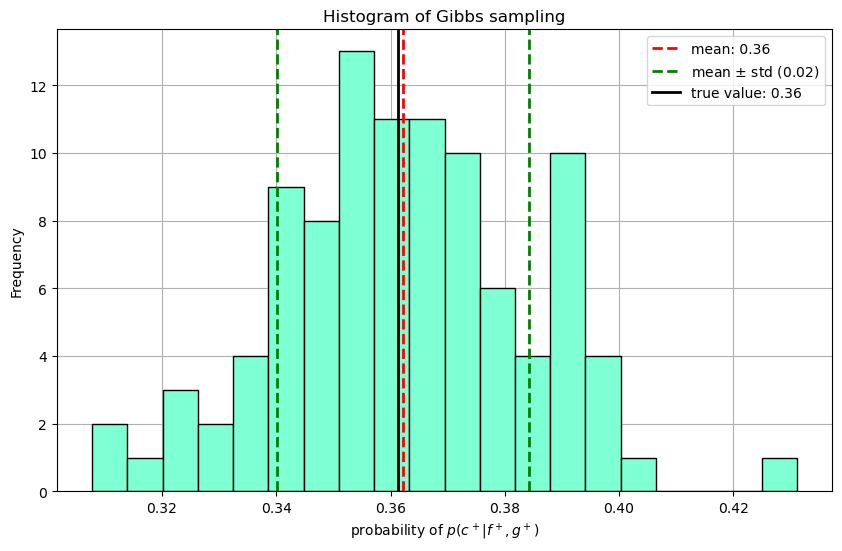

In [19]:
import matplotlib.pyplot as plt

mean_gibbs = np.mean(gibbs_estimations)
std_dev_gibbs = np.std(gibbs_estimations)
x = 0.361364

plt.figure(figsize=(10,6))

plt.rc('axes', axisbelow=True)
plt.hist(gibbs_estimations, color='aquamarine', bins=20, edgecolor='black')
plt.axvline(mean_gibbs, color='red', linestyle='dashed', linewidth=2, label=f'mean: {mean_gibbs:.2f}')
plt.axvline(mean_gibbs - std_dev_gibbs, color='green', linestyle='dashed', linewidth=2, label=f'mean $\pm$ std ({std_dev_gibbs:.2f})')
plt.axvline(mean_gibbs + std_dev_gibbs, color='green', linestyle='dashed', linewidth=2)
plt.axvline(x, color='black', linestyle='solid', linewidth=2, label=f'true value: {x:.2f}')

plt.legend()
plt.xlabel('probability of $p(c^+|f^+,g^+)$')
plt.ylabel('Frequency')
plt.title('Histogram of Gibbs sampling')
plt.grid(True)


plt.show()

## 1.5. Poređenje metoda

Prikazaćemo rezultate obe metode jedno ispod drugog.

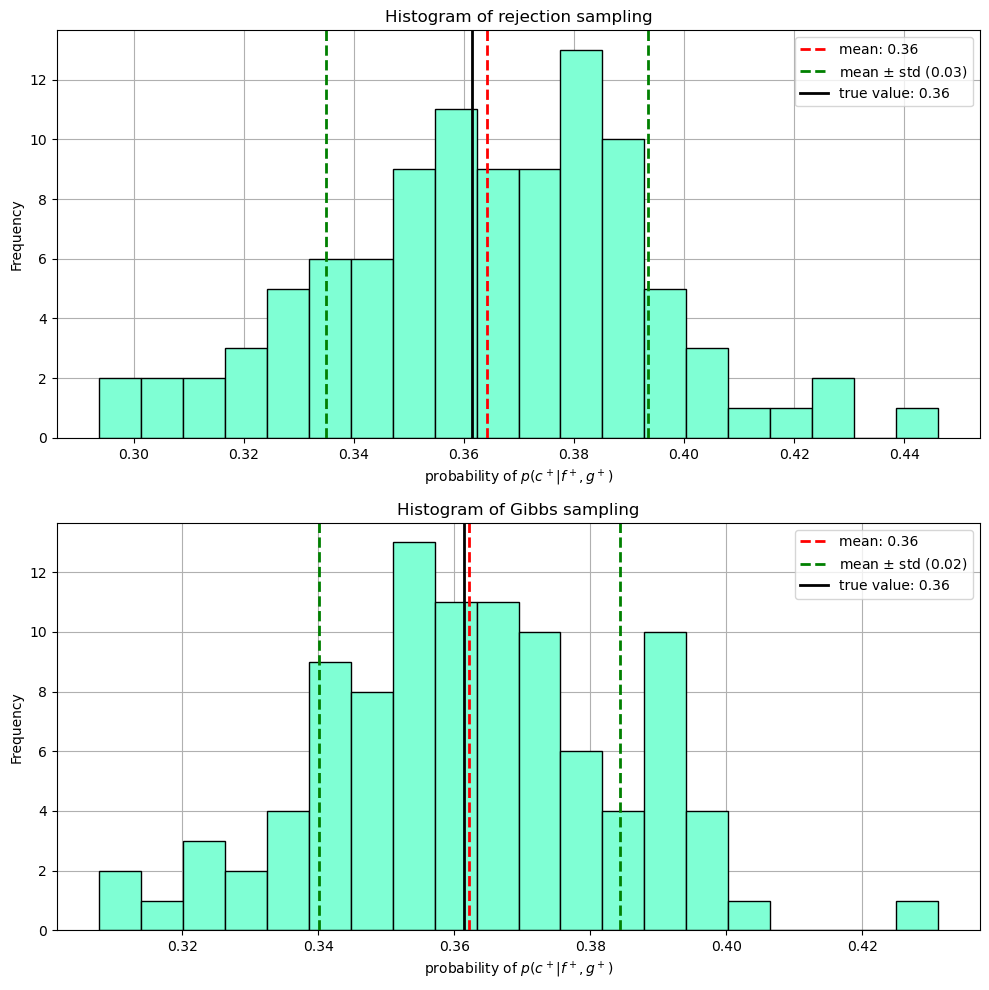

In [37]:
import matplotlib.pyplot as plt

x = 0.361364
mean_rejection = np.mean(rejection_estimations)
std_dev_rejection = np.std(rejection_estimations)
mean_gibbs = np.mean(gibbs_estimations)
std_dev_gibbs = np.std(gibbs_estimations)

plt.figure(figsize=(10,10))

plt.subplot(211)
plt.rc('axes', axisbelow=True)
plt.hist(rejection_estimations, color='aquamarine', bins=20, edgecolor='black')
plt.axvline(mean_rejection, color='red', linestyle='dashed', linewidth=2, label=f'mean: {mean_rejection:.2f}')
plt.axvline(mean_rejection - std_dev_rejection, color='green', linestyle='dashed', linewidth=2, label=f'mean $\pm$ std ({std_dev_rejection:.2f})')
plt.axvline(mean_rejection + std_dev_rejection, color='green', linestyle='dashed', linewidth=2)
plt.axvline(x, color='black', linestyle='solid', linewidth=2, label=f'true value: {x:.2f}')
plt.xlabel('probability of $p(c^+|f^+,g^+)$')
plt.ylabel('Frequency')
plt.title('Histogram of rejection sampling')
plt.legend()
plt.grid(True)

plt.subplot(212)
plt.rc('axes', axisbelow=True)
plt.hist(gibbs_estimations, color='aquamarine', bins=20, edgecolor='black')
plt.axvline(mean_gibbs, color='red', linestyle='dashed', linewidth=2, label=f'mean: {mean_gibbs:.2f}')
plt.axvline(mean_gibbs - std_dev_gibbs, color='green', linestyle='dashed', linewidth=2, label=f'mean $\pm$ std ({std_dev_gibbs:.2f})')
plt.axvline(mean_gibbs + std_dev_gibbs, color='green', linestyle='dashed', linewidth=2)
plt.axvline(x, color='black', linestyle='solid', linewidth=2, label=f'true value: {x:.2f}')
plt.xlabel('probability of $p(c^+|f^+,g^+)$')
plt.ylabel('Frequency')
plt.title('Histogram of Gibbs sampling')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Zadatak 2: Čestični filtar

Čestični filtar predstavlja tehniku temporalnog probabilističkog rezonovanja. Ideja je da generisanjem više raznih čestica procenimo putanju kretanja objekta. Data su nam merenja rastojanja i ugla od merne stanice u fajlu *'observations.csv'*.  

 ## 2.1. Učitavanje .csv fajla

Učitaćemo podatke iz fajla. Merenja se vrše na svakih 1s i zašumljena su. Kako su podaci zašumljeni ćemo opisati u nastavku nakon što opišemo kako modelujemo stanja filtra.

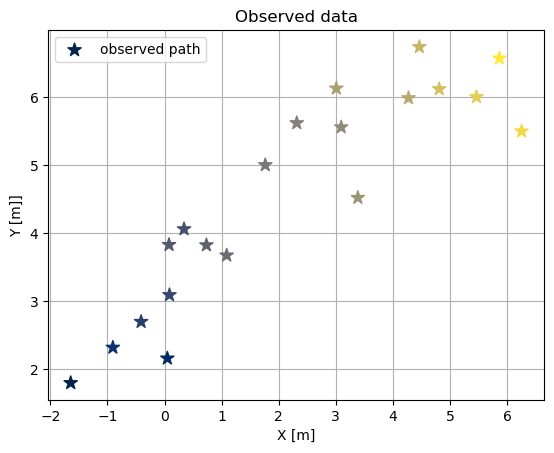

In [9]:
# Reading data from observations.csv
import numpy as np
from random import uniform, random, choice
from math import pi, cos, sin, sqrt, exp, atan
import matplotlib.pyplot as plt

data = np.loadtxt('./observations.csv', delimiter=',')

T,_ = data.shape

rho = data[:,0]
theta = data[:,1]

# Plotting the observed data
x = [rho[i]*cos(theta[i]) for i in range(T)]
y = [rho[i]*sin(theta[i]) for i in range(T)]

# Color gradient
colors = np.linspace(0, 1, T)

plt.scatter(x, y, c=colors, cmap='cividis', label='observed path', marker='*', s=100)

plt.title('Observed data')
plt.xlabel('X [m]')
plt.ylabel('Y [m]]')
plt.legend()
plt.grid('on')

plt.show()

## 2.2. Model česticnog filtra

Ovde treba opisati model za X_t^i i svaki korak koji sprovodimo, kao sto sam u svesci opisao

**Stanje filtra**: $X_t = [x_t, y_t, \Omega_t, k_t]$

$ \qquad $ $x, y$ - pozicije cestice u XY ravni

$ \qquad $ $\Omega$ - ugao vektora brzine u odnosu na x osu

$ \qquad $ $k$ - broj sekundi od poslednjeg menjanja smera brzine


Formiraćemo N=100 cestica sa inicijalnom raspodelom (opisanu ispod) i u svakoj iteraciji cemo vrsiti sledece korake:
- Predikcija: $X_{t|t-1}^{(i)} \sim p(X_t|X_{t-1}^{(i)})$
- Tezinjenje: $w_t^{(i)} \propto p(E_t|X_{t|t-1}^{(i)})$
- Estimacija polozaja: $E(X_t|E_{1:t})$
- Reuzorkovanje 



## 2.3. Inicijalizacija čestičnog filtra: $X_0^{(i)} \sim p(X_0)$

$\qquad x_0^{(i)} \sim Unif[-2,2]$ 

$\qquad y_0^{(i)} \sim Unif[-2,2]$ 

$\qquad \Omega_0^{(i)} \sim Unif[0,2\pi]$ 

$\qquad k_0^{(i)} \sim $
$
\left( \begin{array}{cc} 
0 & 1 & 2 & 3 & 4 \\ 
1/5 & 1/5 & 1/5 & 1/5 & 1/5 
\end{array}
\right)
$

In [10]:
N=100

particles = np.empty((T+1, N, 4), dtype=float)

for i in range(N):
    x_0 = uniform(-2, 2)
    y_0 = uniform(-2, 2)
    omega_0 = uniform(0, 2*pi)
    k_0 = choice(range(0,5))
    particles[0,i] = [x_0, y_0, omega_0, k_0]

## 2.4. Predikcija $ X_{1|0}^{(i)} \sim p(X_1^{(i)}|X_0^{(i)}) $

$x_{1|0}^{(i)} = x_0^{(i)} + 0.5 \cdot cos(\omega_0^{(i)})$

$y_{1|0}^{(i)} = y_0^{(i)} + 0.5 \cdot sin(\omega_0^{(i)})$

$p($ promena $\Omega|k_0^{(i)}) = 0.2 \cdot (k_0^{(i)} + 1)$

$if$ promena $\Omega :$

$ \qquad \Omega_{1|0}^{(i)} = \Omega_0^{(i)} + \Delta, \Delta \sim Unif[-\pi/6, \pi/6], \Omega_{1|0}^{(i)} \in [0,2\pi)$

$ \qquad k_{1|0}^{(i)} = 0$

$else:$

$ \qquad \Omega_{1|0}^{(i)} = \Omega_0^{(i)}$

$ \qquad k_{1|0}^{(i)} = k_0^{(i)} + 1$

In [11]:
predictions = np.empty((T, N, 4), dtype=float)

for i in range(N):
    x_0, y_0, omega_0, k_0 = particles[0, i]

    x_1 = x_0 + 0.5*cos(omega_0)
    y_1 = y_0 + 0.5*sin(omega_0)
    r = random()
    omega_1 = None
    k_1 = None
    if r < 0.2*(k_0+1):
        # Change direction of motion
        delta = uniform(-pi/6, pi/6)
        omega_1 = omega_0 + delta
        if omega_1>2*pi:
            omega_1-=2*pi
        if omega_1<0:
            omega_1+=2*pi
        k_1 = 0
    else:
        omega_1 = omega_0
        k_1 = k_0 + 1

    predictions[0, i] = [x_1, y_1, omega_1, k_1]

## 2.5. Tezinjenje prve iteracije, $w_1^{(i)} \propto p(E_1|X_{1|0}^{(i)})$


$E1 = [\rho_1, \theta_1]$

$w_1^{(i)} \propto p(\rho_1|x_{1|0}^{(i)}, y_{1|0}^{(i)}, \Omega_{1|0}^{(i)}) \cdot p(\theta_1| x_{1|0}^{(i)}, y_{1|0}^{(i)})$

$\rho | x,y,\Omega \sim \mathcal{N}(\sqrt{x^2+y^2}, \sigma^2), \sigma = 0.3 \cdot(2-sin(\theta-\Omega))$

$\theta|x,y \sim Laplace(arctan\frac{y}{x}, b), 2b^2 = \left(\frac{\pi}{36}\right)^2$

In [12]:
weights = np.empty((T, N), dtype=float)

rho_1 = rho[0]
theta_1 = theta[0]
b = pi/36/sqrt(2)

for i in range(N):
    x_1, y_1, omega_1, k_1 = predictions[0, i]

    sigma = 0.3*(2-sin(theta_1-omega_1))

    aposteriori = 1
    aposteriori *= 1/sigma/sqrt(2*pi)
    temp = rho_1 - sqrt(x_1 ** 2 + y_1 ** 2)
    temp **= 2
    temp *= -1/2/(sigma ** 2)
    aposteriori *= exp(temp)
    aposteriori *= 1/2/b
    temp = theta_1-np.arctan2(y_1, x_1)
    temp = -abs(temp)/b
    aposteriori *= exp(temp)

    weights[0, i] = aposteriori

weights[0] = weights[0]/np.sum(weights[0])

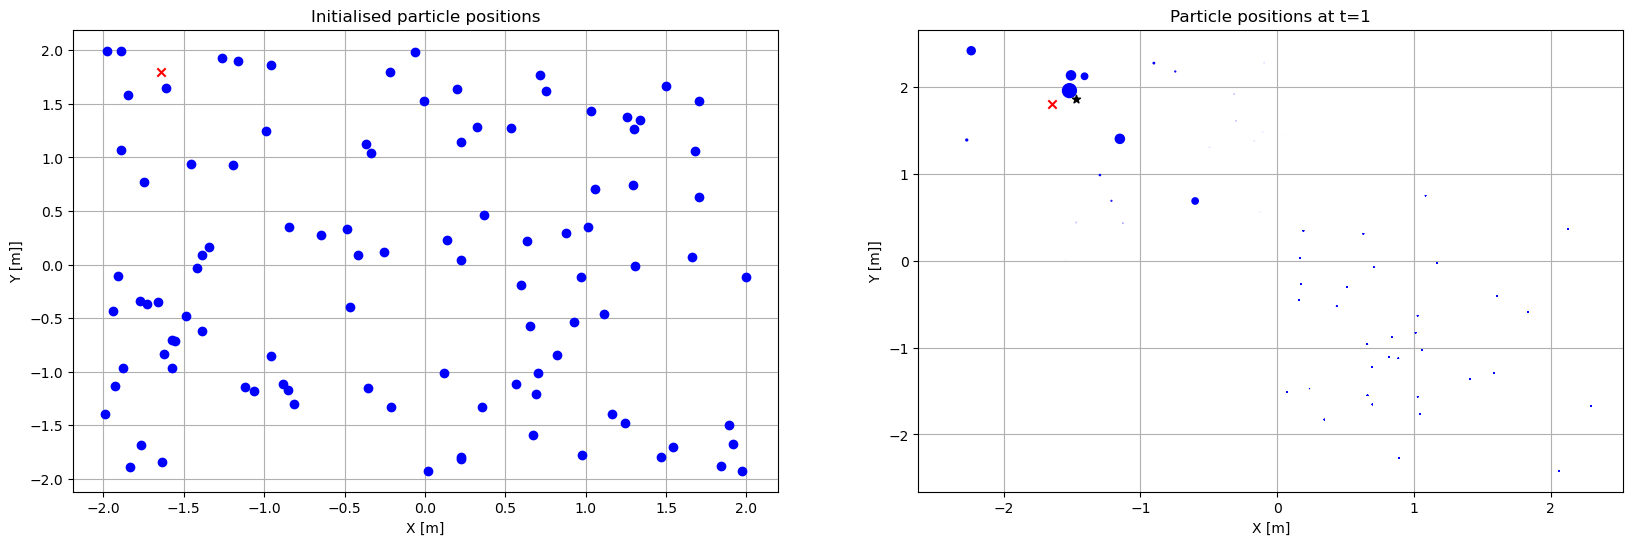

In [13]:
# Prvi neophodni grafici: Tezine cestica posle prve iter
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.subplot(121)
plt.scatter(particles[0,:,0], particles[0,:,1], color='blue', label='Data points')
plt.scatter([rho_1*cos(theta_1)],[rho_1*sin(theta_1)], color='red', marker='x')
plt.title('Initialised particle positions')
plt.xlabel('X [m]')
plt.ylabel('Y [m]]')
plt.grid('on')

plt.subplot(122)
current_weights = weights[0]
max_weight = max(current_weights)
normalized_weights = [weight / max_weight * 100 for weight in current_weights]
plt.scatter(predictions[0,:,0], predictions[0,:,1], s=normalized_weights, color='blue', label='Data points')
plt.scatter([rho_1*cos(theta_1)],[rho_1*sin(theta_1)], color='red', marker='x')
e_x = 0
e_y = 0
for i in range(N):
    e_x += weights[0,i]*predictions[0,i,0]
    e_y += weights[0,i]*predictions[0,i,1]
plt.scatter([e_x], [e_y],marker='*', color='black')
plt.title('Particle positions at t=1')
plt.xlabel('X [m]')
plt.ylabel('Y [m]]')
plt.grid('on')

plt.show()

## 2.6. Druga iteracija bez reuzorkovanja

### 2.6.1. Nereuzorkovanje

In [14]:
predictions_no_resample = np.empty((N,4),dtype=float)
weights_no_resample = np.empty(N,dtype=float)

### 2.6.2 Predikcija $ X_{2|1}^{(i)} \sim p(X_2^{(i)}|X_1^{(i)}) $

In [15]:
for i in range(N):
    x_1, y_1, omega_1, k_1 = predictions[0, i]

    x_2 = x_1 + 0.5*cos(omega_1)
    y_2 = y_1 + 0.5*sin(omega_1)
    r = random()
    omega_2 = None
    k_2 = None
    if r < 0.2*(k_1+1):
        # Change direction of motion
        delta = uniform(-pi/6, pi/6)
        omega_2 = omega_1 + delta
        if omega_2>2*pi:
            omega_2-=2*pi
        if omega_2<0:
            omega_2+=2*pi
        k_2 = 0
    else:
        omega_2 = omega_1
        k_2 = k_1 + 1

    predictions_no_resample[i] = [x_2, y_2, omega_2, k_2]

### 2.6.3. Tezinjenje druge iteracije, $w_2^{(i)} \propto p(E_2|X_{2|1}^{(i)})$

In [16]:
rho_2 = rho[1]
theta_2 = theta[1]
b = pi/36/sqrt(2)

for i in range(N):
    x_2, y_2, omega_2, k_2 = predictions_no_resample[i]

    sigma = 0.3*(2-sin(theta_2-omega_2))

    aposteriori = 1
    aposteriori *= 1/sigma/sqrt(2*pi)
    temp = rho_2 - sqrt(x_2 ** 2 + y_2 ** 2)
    temp **= 2
    temp *= -1/2/(sigma ** 2)
    aposteriori *= exp(temp)
    aposteriori *= 1/2/b
    temp = theta_2-np.arctan2(y_2, x_2)
    temp = -abs(temp)/b
    aposteriori *= exp(temp)

    weights_no_resample[i] = aposteriori

weights_no_resample = weights_no_resample/sum(weights_no_resample)

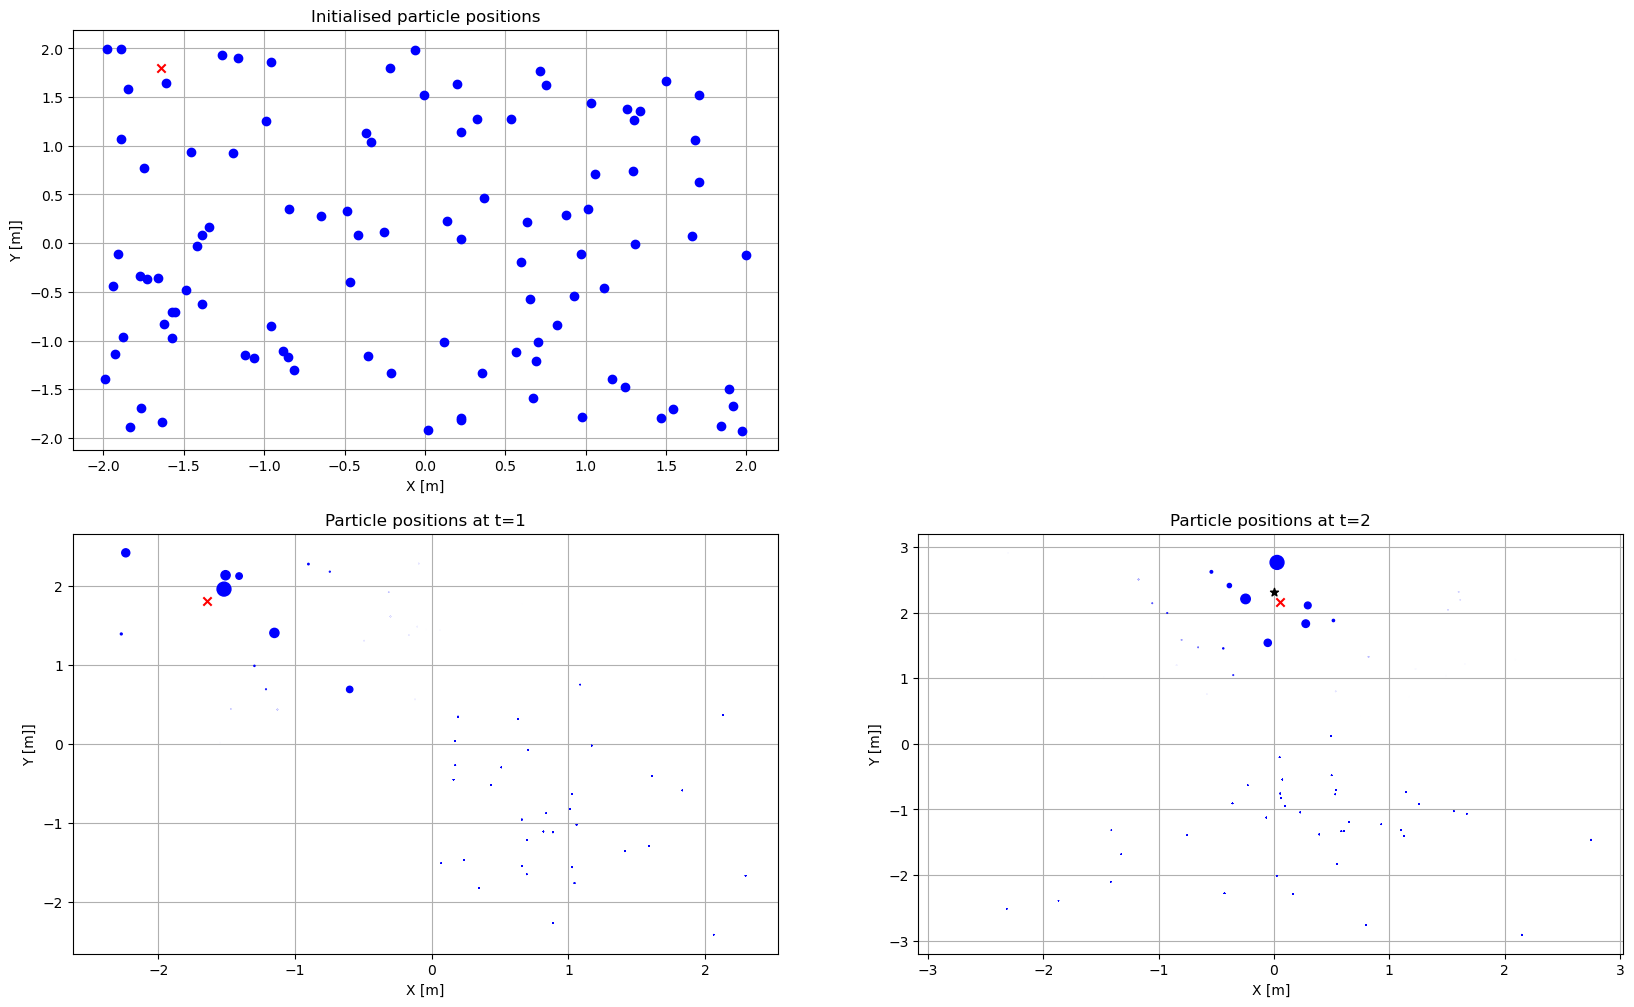

In [17]:
# Drugi neophodni grafici: Tezine cestica posle druge iter bez reuzorkovanja
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
plt.subplot(221)
plt.scatter(particles[0,:,0], particles[0,:,1], color='blue', label='Data points')
plt.scatter([rho_1*cos(theta_1)],[rho_1*sin(theta_1)], color='red', marker='x')
plt.title('Initialised particle positions')
plt.xlabel('X [m]')
plt.ylabel('Y [m]]')
plt.grid('on')

plt.subplot(223)
current_weights = weights[0]
max_weight = max(current_weights)
normalized_weights = [weight / max_weight * 100 for weight in current_weights]
plt.scatter(predictions[0,:,0], predictions[0,:,1], s=normalized_weights, color='blue', label='Data points')
plt.scatter([rho_1*cos(theta_1)],[rho_1*sin(theta_1)], color='red', marker='x')
plt.title('Particle positions at t=1')
plt.xlabel('X [m]')
plt.ylabel('Y [m]]')
plt.grid('on')

e_x = 0
e_y = 0
for i in range(N):
    e_x += weights_no_resample[i]*predictions_no_resample[i,0]
    e_y += weights_no_resample[i]*predictions_no_resample[i,1]

plt.subplot(224)
current_weights = weights_no_resample
max_weight = max(current_weights)
normalized_weights = [weight / max_weight * 100 for weight in current_weights]
plt.scatter(predictions_no_resample[:,0], predictions_no_resample[:,1], s=normalized_weights, color='blue', label='Data points')
plt.scatter([rho_2*cos(theta_2)],[rho_2*sin(theta_2)], color='red', marker='x')
plt.scatter([e_x],[e_y],marker='*',color='black')
plt.title('Particle positions at t=2')
plt.xlabel('X [m]')
plt.ylabel('Y [m]]')
plt.grid('on')

plt.show()

## 2.7. Druga iteracija sa reuzorkovanjem


$j \sim $
$
\left( \begin{array}{cc} 
0 & 1 & ... & N -1 \\
w_t^{(0)} & w_t^{(1)} & ... & w_t^{(N)}
\end{array}
\right)
$

### 2.7.1. Reuzorkovanje

In [18]:
# Koristimo nizove weights[0], indexes i running_sum

# Pravimo listu takvu da...
# Unsorted list of floats
unsorted_list = weights[0]

# Pair each element with its index using enumerate
indexed_list = list(enumerate(unsorted_list))

# Sort the list of pairs based on the values (second element of the pairs)
sorted_indexed_list = sorted(indexed_list, key=lambda x: x[1])

# Extract the indices from the sorted pairs
indexes = [index for index, value in sorted_indexed_list]
sorted_weights = [value for index, value in sorted_indexed_list]

running_sum = np.cumsum(sorted_weights)

for i in range(N):
    r = random()
    j = 0
    while(running_sum[j]<r):
        j+=1
    particles[1,i] = predictions[0, indexes[j]]

### 2.7.2. Predikcija $ X_{2|1}^{(i)} \sim p(X_2^{(i)}|X_1^{(i)}) $

In [19]:
for i in range(N):
    x_1, y_1, omega_1, k_1 = particles[1, i]

    x_2 = x_1 + 0.5*cos(omega_1)
    y_2 = y_1 + 0.5*sin(omega_1)
    r = random()
    omega_2 = None
    k_2 = None
    if r < 0.2*(k_1+1):
        # Change direction of motion
        delta = uniform(-pi/6, pi/6)
        omega_2 = omega_1 + delta
        if omega_2>2*pi:
            omega_2-=2*pi
        if omega_2<0:
            omega_2+=2*pi
        k_2 = 0
    else:
        omega_2 = omega_1
        k_2 = k_1 + 1

    predictions[1, i] = [x_2, y_2, omega_2, k_2]

### 2.7.3. Tezinjenje druge iteracije, $w_2^{(i)} \propto p(E_2|X_{2|1}^{(i)})$

In [20]:
rho_2 = rho[1]
theta_2 = theta[1]
b = pi/36/sqrt(2)

for i in range(N):
    x_2, y_2, omega_2, k_2 = predictions[1, i]

    sigma = 0.3*(2-sin(theta_2-omega_2))

    aposteriori = 1
    aposteriori *= 1/sigma/sqrt(2*pi)
    temp = rho_2 - sqrt(x_2 ** 2 + y_2 ** 2)
    temp **= 2
    temp *= -1/2/(sigma ** 2)
    aposteriori *= exp(temp)
    aposteriori *= 1/2/b
    temp = theta_2-np.arctan2(y_2, x_2)
    temp = -abs(temp)/b
    aposteriori *= exp(temp)

    weights[1, i] = aposteriori

weights[1] = weights[1]/np.sum(weights[1])

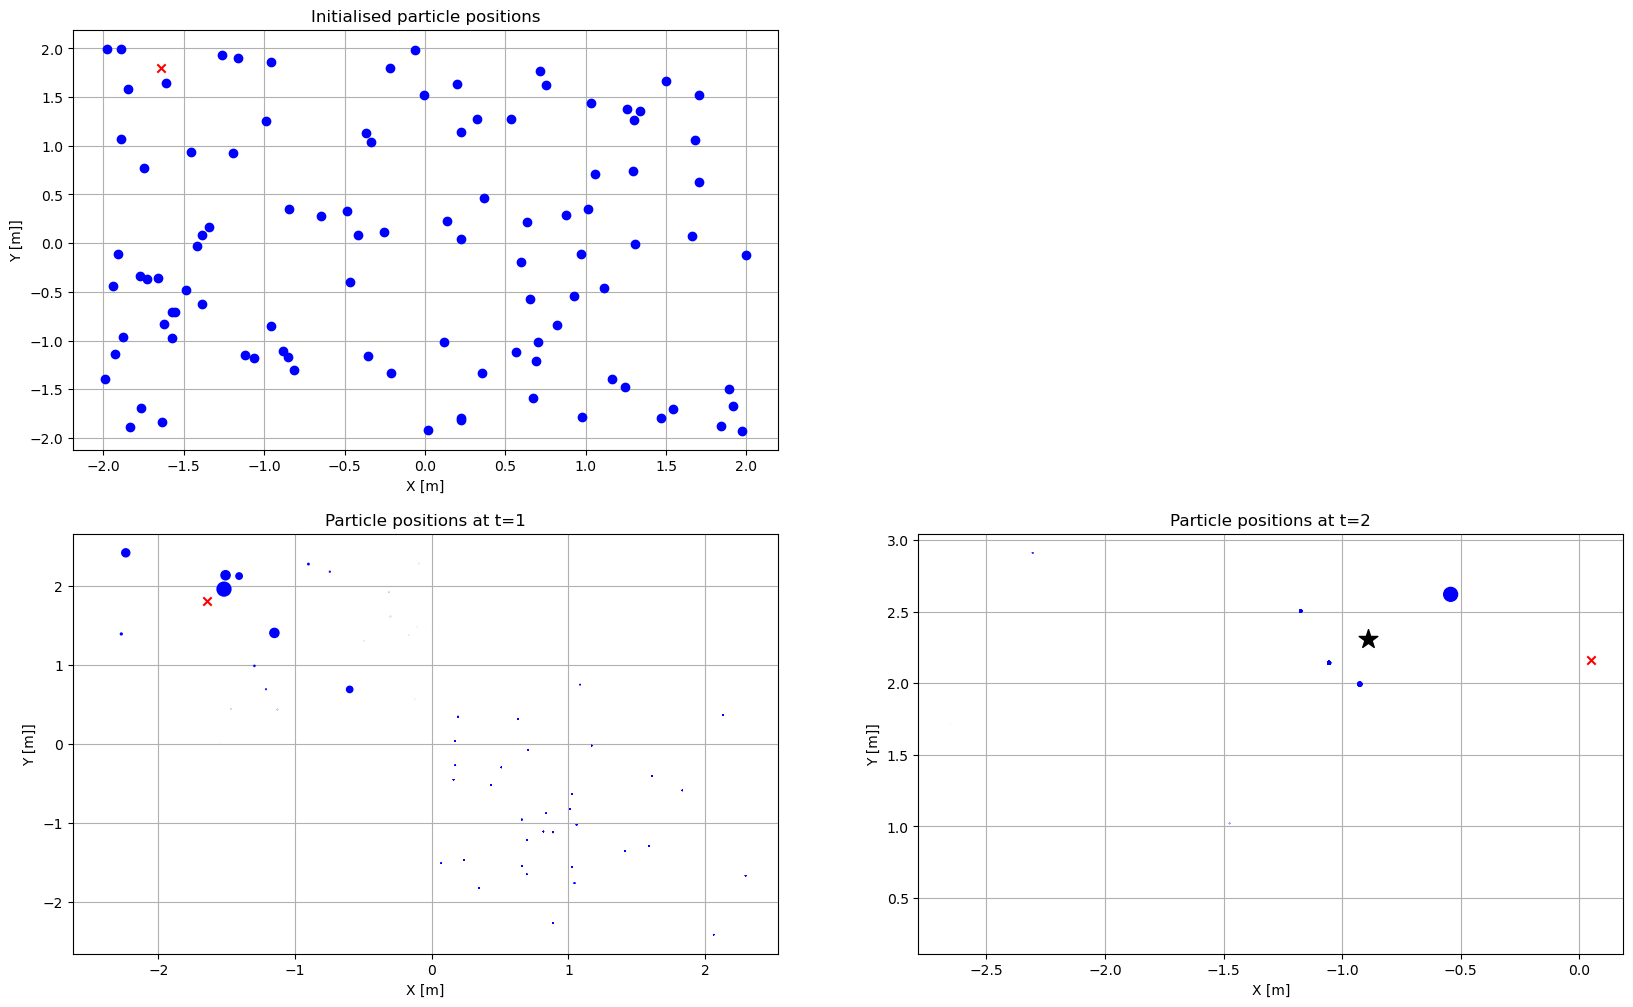

In [21]:
# Drugi neophodni grafici: Tezine cestica posle druge iter sa reuzorkovanjem
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
plt.subplot(221)
plt.scatter(particles[0,:,0], particles[0,:,1], color='blue', label='Data points')
plt.scatter([rho_1*cos(theta_1)],[rho_1*sin(theta_1)], color='red', marker='x')
plt.title('Initialised particle positions')
plt.xlabel('X [m]')
plt.ylabel('Y [m]]')
plt.grid('on')

plt.subplot(223)
current_weights = weights[0]
max_weight = max(current_weights)
normalized_weights = [weight / max_weight * 100 for weight in current_weights]
plt.scatter(predictions[0,:,0], predictions[0,:,1], s=normalized_weights, color='blue', label='Data points')
plt.scatter([rho_1*cos(theta_1)],[rho_1*sin(theta_1)], color='red', marker='x')
plt.title('Particle positions at t=1')
plt.xlabel('X [m]')
plt.ylabel('Y [m]]')
plt.grid('on')

e_x = 0
e_y = 0
for i in range(N):
    e_x += weights[1,i]*predictions[1,i,0]
    e_y += weights[1,i]*predictions[1,i,1]

plt.subplot(224)
current_weights = weights[1]
max_weight = max(current_weights)
normalized_weights = [weight / max_weight * 100 for weight in current_weights]
plt.scatter(predictions[1,:,0], predictions[1,:,1], s=normalized_weights, color='blue', label='Data points')
plt.scatter([rho_2*cos(theta_2)],[rho_2*sin(theta_2)], color='red', marker='x')
plt.scatter([e_x],[e_y],color='black',marker='*',s=200)
plt.title('Particle positions at t=2')
plt.xlabel('X [m]')
plt.ylabel('Y [m]]')
plt.grid('on')

plt.show()

**Komentar**: Uočava se efekat 'osiromašenja' uzorka (mana postupka reuzorkovanja).

## 2.8. Izvršavanje čestičnog filtra

Izvršene su prve 2 iteracije, potrebno je uraditi jos T-2

In [22]:
for t in range(2,T):
    # Reuzorkovanje
    unsorted_list = weights[t-1]
    indexed_list = list(enumerate(unsorted_list))
    sorted_indexed_list = sorted(indexed_list, key=lambda x: x[1])

    indexes = [index for index, value in sorted_indexed_list]
    sorted_weights = [value for index, value in sorted_indexed_list]

    running_sum = np.cumsum(sorted_weights)
    for i in range(N):
        r = random()
        j = 0
        while(running_sum[j]<r):
            j+=1
        particles[t, i] = predictions[t-1, indexes[j]]

    # Predikcija
    for i in range(N):
        x_t, y_t, omega_t, k_t = particles[t, i]

        x_pred = x_t + 0.5*cos(omega_t)
        y_pred = y_t + 0.5*sin(omega_t)
        r = random()
        omega_pred = None
        k_pred = None
        if r < 0.2*(k_t+1):
            # Change direction of motion
            delta = uniform(-pi/6, pi/6)
            omega_pred = omega_t + delta
            if omega_pred>2*pi:
                omega_pred-=2*pi
            if omega_pred<0:
                omega_pred+=2*pi
            k_pred = 0
        else:
            omega_pred = omega_t
            k_pred = k_t + 1

        predictions[t, i] = [x_pred, y_pred, omega_pred, k_pred]
    
    # Tezinjenje
    rho_t = rho[t]
    theta_t = theta[t]
    b = pi/36/sqrt(2)

    for i in range(N):
        x_pred, y_pred, omega_pred, k_pred = predictions[t, i]

        sigma = 0.3*(2-sin(theta_t-omega_pred))

        w = 1
        w *= 1/sigma/sqrt(2*pi)
        temp = rho_t - sqrt(x_pred ** 2 + y_pred ** 2)
        temp **= 2
        temp *= -1/2/(sigma ** 2)
        w *= exp(temp)
        w *= 1/2/b
        temp = theta_t-np.arctan2(y_pred, x_pred)
        temp = -abs(temp)/b
        w *= exp(temp)

        weights[t, i] = w

    weights[t] = weights[t]/np.sum(weights[t])

## 2.9. Estimacije $E(X_t|E_{1:t})$

$ E(x_t|E_{1:t}) \approx \sum\limits_{i=1}^{N} w^{(i)} x_t^{(i)}$

$ E(y_t|E_{1:t}) \approx \sum\limits_{i=1}^{N} w^{(i)} y_t^{(i)}$

$ E(\rho_t|E_{1:t}) = \sqrt{E_{x_t}^2+E_{y_t}^2}$

$ E(\theta_t|E_{1:t}) = arctan \frac{E_{y_t}}{E_{x_t}}$

In [23]:
x_estimated = np.empty(T)
y_estimated = np.empty(T)
uncertainty_sigma = np.empty(T, dtype=float)

for t in range(T):
    e_x = 0
    e_y = 0
    e_omega = 0
    for i in range(N):
        e_x += weights[t,i]*predictions[t,i,0]
        e_y += weights[t,i]*predictions[t,i,1]
        e_omega +=predictions[t,i,2]
    e_omega /= N
    
    uncertainty_sigma[t] = 0.3*(2-sin(theta[t]-e_omega))
    x_estimated[t] = e_x
    y_estimated[t] = e_y

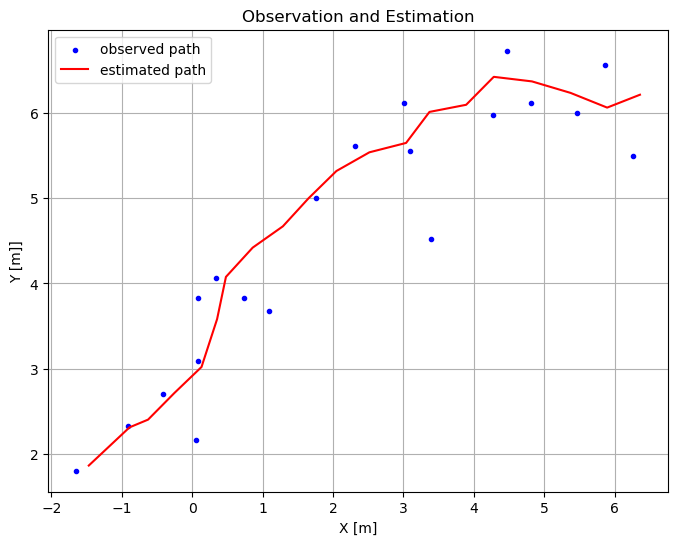

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', marker='.', label='observed path')

plt.plot(x_estimated, y_estimated, color='red', label='estimated path')

plt.title('Observation and Estimation')
plt.xlabel('X [m]')
plt.ylabel('Y [m]]')
plt.grid('on')
plt.legend()

plt.show()

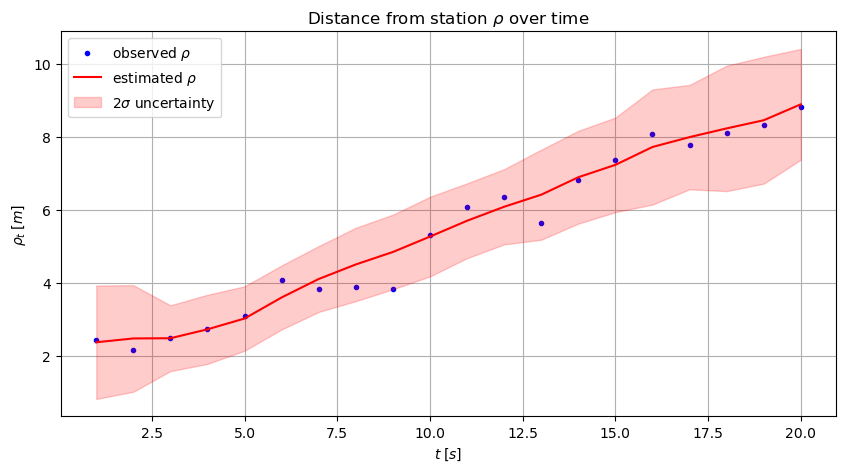

In [25]:
rho_estimated = [sqrt(x_estimated[t]**2+y_estimated[t]**2) for t in range(T)]

plt.figure(figsize=(10,5))
t = range(1,21)
plt.scatter(t, rho, marker='.', color='blue', label=r'observed $\rho$')
plt.plot(t, rho_estimated, color='red', label=r'estimated $\rho$')
# 2-sigma uncertainty 
variance_upper = rho_estimated+2*uncertainty_sigma
variance_lower = rho_estimated-2*uncertainty_sigma
# plt.plot(t, variance_upper, linewidth=0.5)
# plt.plot(t, variance_lower, linewidth=0.5)
plt.fill_between(t,variance_lower,variance_upper,color='red',alpha=0.2, label=r'$2\sigma$ uncertainty')

plt.xlabel(r'$t \; [s]$')
plt.ylabel(r'$\rho_t \; [m]$')
plt.title(r'Distance from station $\rho$ over time')
plt.grid('on')
plt.legend()

plt.show()

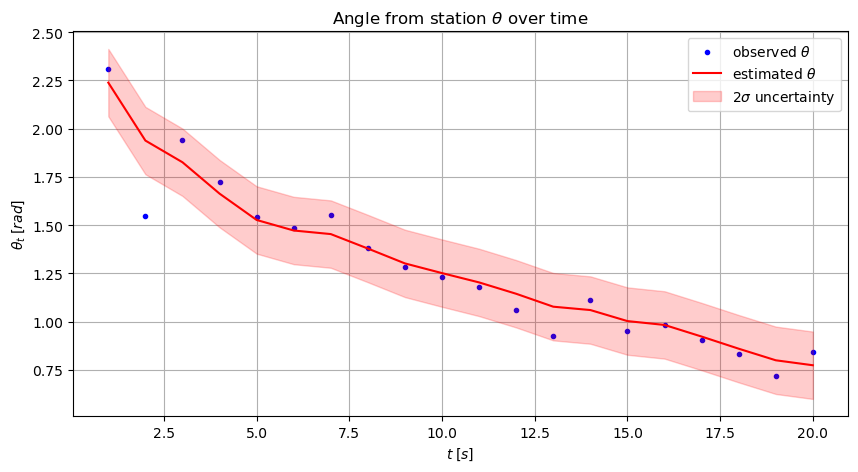

In [26]:
theta_estimated = np.array([np.arctan2(y_estimated[t],x_estimated[t]) for t in range(T)])

plt.figure(figsize=(10,5))
t = range(1,21)
plt.scatter(t, theta, marker='.', color='blue', label=r'observed $\theta$')
plt.plot(t, theta_estimated, color='red', label=r'estimated $\theta$')
# 2-sigma uncertainty 
variance_upper = theta_estimated+2*pi/36
variance_lower = theta_estimated-2*pi/36
plt.fill_between(t,variance_lower,variance_upper, color='red',alpha=0.2, label=r'$2\sigma$ uncertainty')

plt.xlabel(r'$t \;[s]$')
plt.ylabel(r'$\theta_t \; [rad]$')
plt.title(r'Angle from station $\theta$ over time')
plt.grid('on')
plt.legend()

plt.show()